# EXAMEN

### Importar librerias

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import tweepy as tw
from tweepy import OAuthHandler
import numpy as np
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Obtener informacion de las proximas elecciones

In [8]:
def contador(post):
    cont=0
    for char in post:        
            cont+=1
    return cont
publi = [] 
for post in get_posts('AlvaroNoboaPonton', pages=2):
        post['Word count'] = len(post['text'])
        publi.append(post)          
facebook_posts = pd.DataFrame(publi)
facebook_posts.describe()

,Word count,comments,likes,shares
count,6.000000,6.000000,6.000000,6.0
mean,153.833333,3824.666667,20201.333333,0.0
std,186.400018,5742.400671,25983.161537,0.0
min,21.000000,153.000000,3647.000000,0.0
25%,42.000000,575.000000,6916.000000,0.0
50%,78.000000,998.000000,9722.500000,0.0
75%,174.000000,4370.750000,17485.000000,0.0
max,510.000000,14870.000000,72063.000000,0.0


In [18]:
posts = []
for post in get_posts('yakuperezoficial', pages=10):
    post['numWord']=contador(post['text'])
    posts.append(post)
for post in get_posts('PaulErnestoCarrascoC', pages=10):
    post['numWord']=contador(post['text'])    
    posts.append(post) 
fb_posts = pd.DataFrame(posts)
file = open("shares.txt","w") 
for like in fb_posts['shares']:
    file.write(str(like)+'\n')
file.close()
fb_posts.describe()

,comments,likes,numWord,shares
count,76.000000,76.000000,76.000000,76.000000
mean,202.421053,921.710526,221.697368,120.921053
std,382.955846,942.582634,107.814906,295.842335
min,0.000000,9.000000,0.000000,0.000000
25%,2.000000,19.750000,149.250000,0.000000
50%,56.000000,985.500000,228.000000,0.000000
75%,121.500000,1568.250000,283.500000,0.000000
max,1863.000000,4797.000000,540.000000,1149.000000


In [19]:
fb_posts.head()

,comments,image,images,likes,link,numWord,post_id,post_text,post_url,shared_text,shares,text,time,user_id,video,video_id,video_thumbnail
0,200,None,[],2268,None,181,3323645617775175,"Te invito a conocer mi historia, vengo del Ecu...",https://facebook.com/watch?v=2862820253993582,,0,"Te invito a conocer mi historia, vengo del Ecu...",2020-12-18 17:14:25,2069422096530873,https://video.fcue3-1.fna.fbcdn.net/v/t42.9040...,2862820253993582,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.5...
1,56,https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0-...,[https://scontent.fcue3-1.fna.fbcdn.net/v/t1.0...,911,None,362,3325347017605035,Siempre estaremos agradecidos a esta ciudad de...,https://facebook.com/story.php?story_fbid=3325...,,0,Siempre estaremos agradecidos a esta ciudad de...,2020-12-20 21:28:53,2069422096530873,None,None,None
2,1408,None,[],1620,http://www.yakuperez.com/,243,385648012502573,⭕️ EN VIVO | En Minka recorriendo las calles d...,https://facebook.com/watch?v=385648012502573,,1149,⭕️ EN VIVO | En Minka recorriendo las calles d...,2020-12-20 19:17:35,2069422096530873,https://scontent.fcue3-1.fna.fbcdn.net/v/t66.3...,385648012502573,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.1...
3,1327,None,[],1969,http://www.yakuperez.com/,235,3527467170811722,⭕️ EN VIVO | La caravana de la honestidad lleg...,https://facebook.com/watch?v=3527467170811722,,924,⭕️ EN VIVO | La caravana de la honestidad lleg...,2020-12-20 18:25:40,2069422096530873,https://scontent.fcue3-1.fna.fbcdn.net/v/t66.3...,3527467170811722,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.1...
4,1863,None,[],1651,http://www.yakuperez.com/,231,416013382875064,⭕️ EN VIVO | La caravana de la honestidad lleg...,https://facebook.com/watch?v=416013382875064,,1131,⭕️ EN VIVO | La caravana de la honestidad lleg...,2020-12-20 17:16:18,2069422096530873,https://scontent.fcue3-1.fna.fbcdn.net/v/t66.3...,416013382875064,https://scontent.fcue3-1.fna.fbcdn.net/v/t15.1...


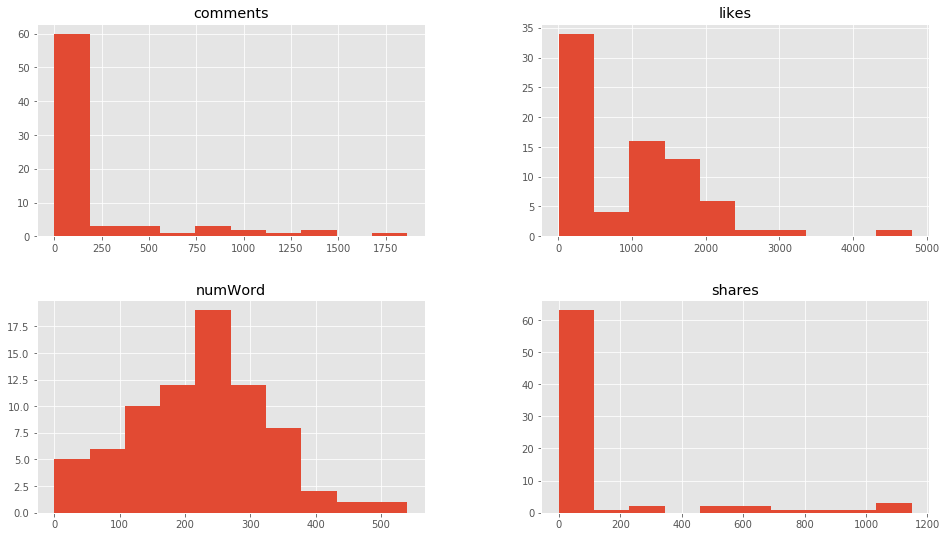

In [36]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

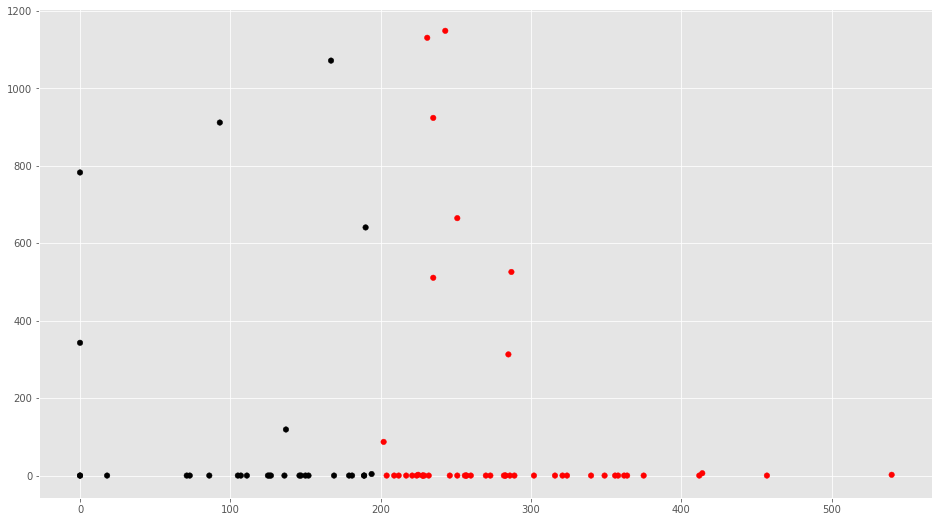

In [37]:
#Visualizamos la cantidad de palabras contra likes
colores=['red','black']
tamanios=[30,60]

filtered_data = fb_posts[(fb_posts['numWord'] <= 4000) & (fb_posts['shares'] <= 90000)]

f1 = filtered_data['numWord'].values
f2 = filtered_data['shares'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

# Regresion Lineal

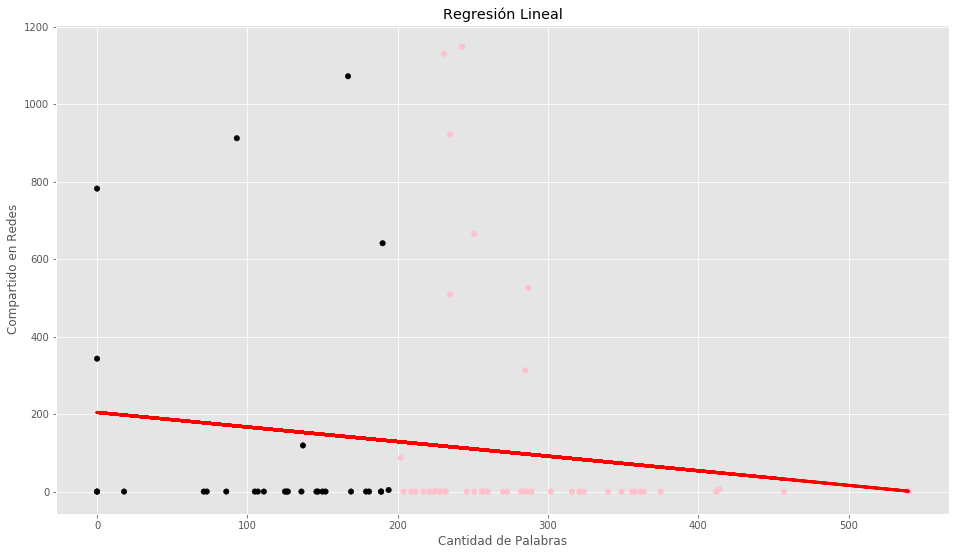

In [16]:
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['shares'].values
 
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)
 
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [17]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

-548


# Regresion multiples variables

In [31]:
suma = (filtered_data["likes"] + filtered_data['comments'].fillna(0))

dataX2 =pd.DataFrame()
dataX2["numWord"] = filtered_data["numWord"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['shares'].values

In [32]:
regr2 = linear_model.LinearRegression()
regr2.fit(XY_train, z_train)
z_pred = regr2.predict(XY_train)
print('Coeficientes', regr2.coef_)
print("Error medio" % mean_squared_error(z_train, z_pred))
print('Valor' % r2_score(z_train, z_pred))

Coeficientes [-0.52716561  0.15146218]
Error medio
Valor


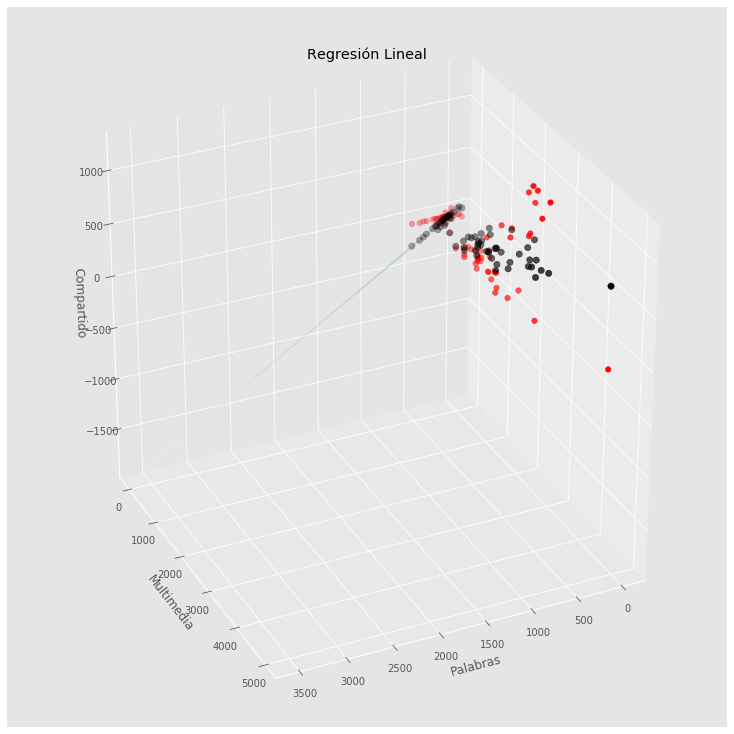

In [29]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
z = (nuevoX + nuevoY + regr2.intercept_)
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='GnBu',)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='red',s=30)
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='black',s=40)
ax.view_init(elev=30., azim=65)
ax.set_title('Regresión Lineal')
ax.set_xlabel('Palabras')
ax.set_ylabel('Multimedia')
ax.set_zlabel('Compartido')

plt.show()

In [21]:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

-983


### Conclusion

Mediante la obtencion de datos de redes sociales se puede obtener la tendencia de las elecciones precidenciales